In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from torch import nn
import numpy as np
import torch

from unityagents import UnityEnvironment
from model.ddpg import DDPGAgent, DDPGTrainer


In [2]:
# env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher.app', no_graphics=True)
env = UnityEnvironment(file_name='/Users/claudcop/code/deep-rl/DeepRL_Continuous_Control/unity/Reacher20.app', no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


: 

INFO:trainer:	------------------------------ Training ------------------------------
INFO:trainer:	N Episodes 300 , max length episode: 100000
INFO:trainer:	Target score: 30.0
INFO:trainer:	----------------------------------------------------------------------
Episode 186 Score: 27.87, 100 episode Mean Score: 29.48:  62%|██████▏   | 185/300 [1:02:58<39:08, 20.42s/it]  
INFO:trainer:	Training Finished at episode 186


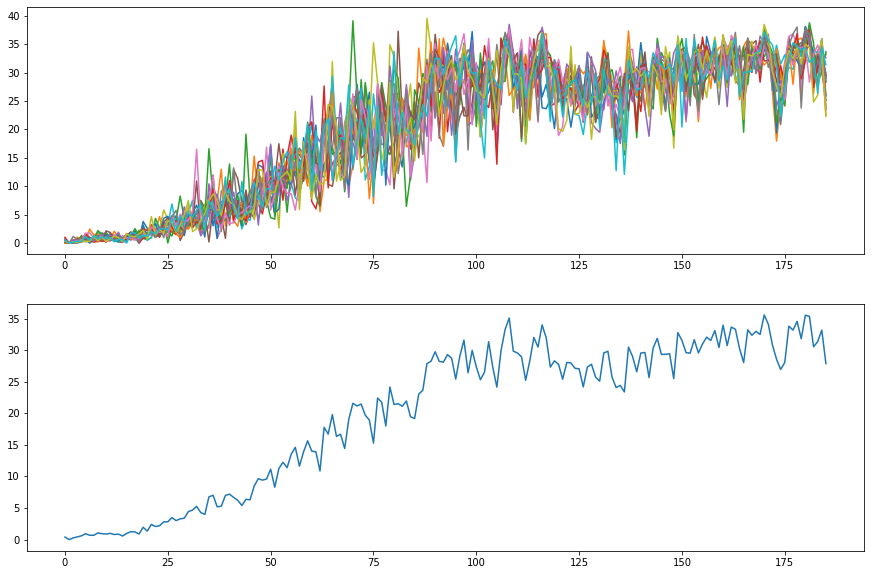

In [3]:
agent = DDPGAgent(env, network_config={
    'actor_hidden_sizes':[256, 128], 
    'critic_hidden_sizes':[256, 128]}, seed=4)

trainer = DDPGTrainer(agent, gamma=0.99, 
                      learning_rate_actor=1e-4, 
                      learning_rate_critic=1e-4)

trained_agent = trainer.train(
    n_episodes=300, 
    max_steps_per_episode=100000,
    )

fig, ax = plt.subplots(figsize=(15, 10), nrows=2)
ax[0].plot(trainer.scores)
ax[1].plot(np.asarray(trainer.scores).mean(axis=1))

INFO:trainer:	------------------------------ Training ------------------------------
INFO:trainer:	N Episodes 300 , max length episode: 100000
INFO:trainer:	Target score: 30.0
INFO:trainer:	----------------------------------------------------------------------
Episode 203 Score: 31.35, 100 episode Mean Score: 29.22:  67%|██████▋   | 202/300 [3:34:51<1:44:14, 63.82s/it]
INFO:trainer:	Training Finished at episode 203


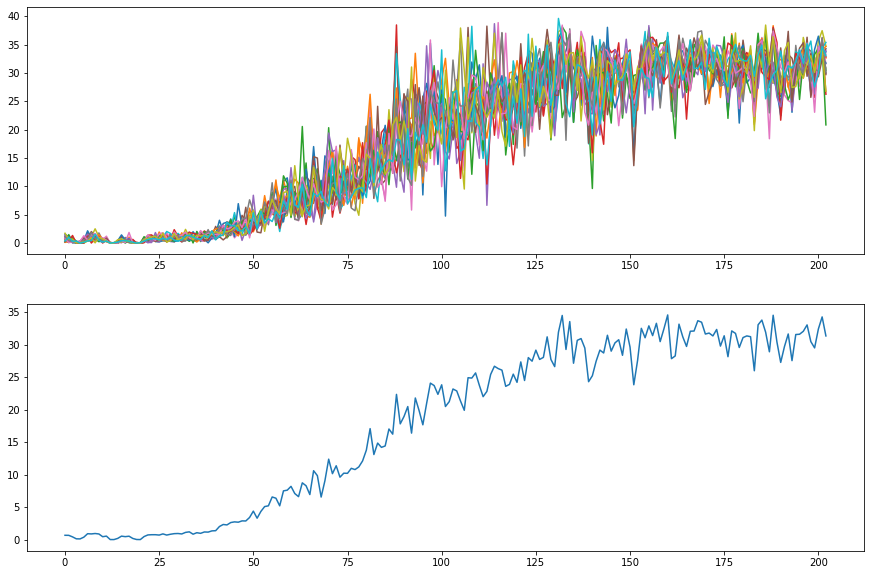

In [4]:
priority_agent = DDPGAgent(env, network_config={
    'actor_hidden_sizes':[256, 128], 
    'critic_hidden_sizes':[256, 128]}, seed=4)

priority_trainer = DDPGTrainer(priority_agent, gamma=0.99, 
                      learning_rate_actor=1e-4, 
                      learning_rate_critic=1e-4,
                      replaybuffer_type='priority', 
                      filename='priority_DDPG.pth')

priority_trained_agent = trainer.train(
    n_episodes=300, 
    max_steps_per_episode=100000,
    )

fig, ax = plt.subplots(figsize=(15, 10), nrows=2)
ax[0].plot(trainer.scores)
ax[1].plot(np.asarray(trainer.scores).mean(axis=1))

In [ ]:
import pickle

execution = {
    'base': {
        'agent': agent,
        'trainer': trainer},
    'priority': {
        'agent': priority_agent,
        'trainer': priority_trainer
        }}

with open('training.pkl', 'wb') as file:
    pickle.dump(execution, file)




In [ ]:
# agent_test_scores = [agent.run_test_episode() for i in range(100)]
# priority_agent_test_scores = [agent.run_test_episode() for i in range(100)]